In [1]:
import sys
sys.path += [".."]

import smbh
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt

In [2]:
v0 = 70 # to kpc / gyr

In [3]:
baryonics = [0, 0.05, 0.1, 0.156]

In [4]:
results = []
for fb in baryonics:
    smbh.setBaryonicFraction(fb)
    result = smbh.run([v0, 0, 0], pot_type = smbh.SYMMETRIC)
    results.append(result)

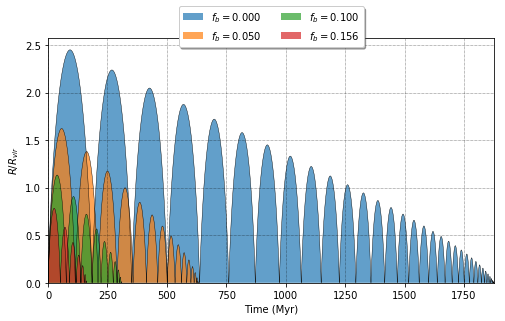

In [5]:
t_max = 0
fig, ax = plt.subplots(figsize = (8, 4.5))

for (i, result) in enumerate(results):
    t = 1000 * result.times
    if t[-1] > t_max: t_max = t[-1]
    fb = baryonics[i]
    y = result.distance / result.R_VIR
    label = '$f_b = %.3f$' % fb
    ax.plot(t, y, c = 'k', lw = 0.4)
    ax.fill_between(t, 0, y, alpha = 0.7, label = label)
    
ax.set_xlabel('Time (Myr)')
ax.set_ylabel(r'$R / R_{vir}$')

ax.set_xlim(0, t_max)
ax.set_ylim(0, ax.get_ylim()[1])

smbh.coolLegend(ax, ncol = 2)

ax.grid()

fig.savefig('baryonic_fraction_comparison.png', dpi = 300)

plt.show()

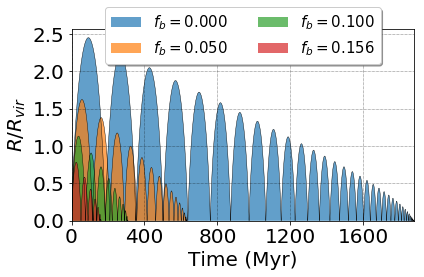

In [9]:
t_max = 0
fig, ax = plt.subplots()

for (i, result) in enumerate(results):
    t = 1000 * result.times
    if t[-1] > t_max: t_max = t[-1]
    fb = baryonics[i]
    y = result.distance / result.R_VIR
    label = '$f_b = %.3f$' % fb
    ax.plot(t, y, c = 'k', lw = 0.4)
    ax.fill_between(t, 0, y, alpha = 0.7, label = label)

ax.set_xlabel('Time (Myr)')
ax.set_ylabel(r'$R / R_{vir}$')

fs = 20

smbh.changeFontSize(ax, fs, xbins = 5)

ax.set_xlim(0, t_max)
ax.set_ylim(0, ax.get_ylim()[1])

smbh.coolLegend(ax, ncol = 2, fontsize = 0.75 * fs)

ax.grid()

fig.tight_layout()

fig.savefig('baryonic_fraction_comparison_slides.png', dpi = 300)

plt.show()

In [7]:
return_times = np.array([result.RETURN_TIME * 1000 for result in results])

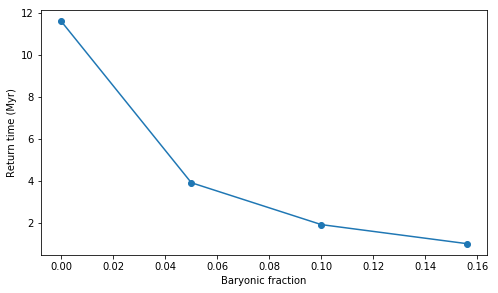

In [8]:
fig, ax = plt.subplots(figsize = (8, 4.5))

ax.plot(baryonics, return_times / min(return_times), '-o')

# ax.set_yscale('log')
ax.set_ylabel('Return time (Myr)')
ax.set_xlabel('Baryonic fraction')

fig.savefig('effect.png', dpi = 300)